In [45]:
import os
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('../src')
sys.path.append('..')
import datas
from config_manager import ConfigManager

cfg = ConfigManager()
cfg._load_config('../params')
cfg = cfg.config

# Directory containing the evaluation files
eval_dir = '../eval/'

filenames = [
    "steering_idkQA_baseline_results_evaluated.pkl",
    "steering_idkQA_steer_celeb+eng_results_evaluated.pkl",
    "steering_idkQA_steer_celeb+eng_neg_results_evaluated.pkl"]

data_name = ['baseline', 'celeb+eng', 'celeb+eng_neg']

# Load all the dictionaries from the pickled files
eval_dicts = [pd.read_pickle(os.path.join(eval_dir, filename)) for filename in filenames]

In [46]:
print(list(eval_dicts[0][0].keys()))

['data_elt', 'output_text', 'number_gen_token', 'id_max_sim', 'similarities', 'evaluation', 'mean_evaluation', 'correct_id', 'wrong_id', 'idk_id', 'max_mean_sim']


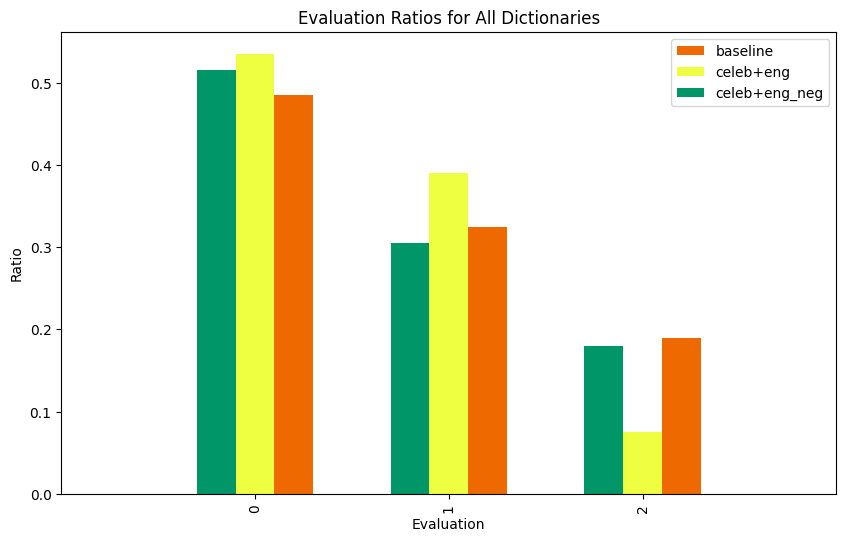

In [51]:
colors = cfg["palette"]

#plt.cm.viridis(np.linspace(0, 1, len(eval_dicts)))
# Use the data_name list for labels
plt.figure(figsize=(10, 6))
for i, eval_dict in enumerate(eval_dicts):
    eval_df = pd.DataFrame(eval_dict)
    eval_counts = eval_df["evaluation"].value_counts(normalize=True)
    eval_counts.plot(kind='bar', label=data_name[i], color=colors[i], width=0.2, position=i-0.5)
    plt.gca().set_xlim([-1, len(eval_counts)])

plt.title("Evaluation Ratios for All Dictionaries")
plt.xlabel("Evaluation")
plt.ylabel("Ratio")
plt.legend()
plt.show()
